In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import glob

In [63]:
def MetricsOfReliability(clf, data_test_df, data_label_df, clf_predict_df):
    accuracy = metrics.accuracy_score(data_label_df, clf_predict_df)
    print('accuracy = ' + str(accuracy))

    tn, fp, fn, tp = metrics.confusion_matrix(data_label_df, clf_predict_df).ravel()
    sensitivity = tn/(tn + fp)
    print('sensitivity = ' + str(sensitivity))

    specificity = tp/(tp + fn)
    print('specificity = ' + str(specificity))

    metrics.plot_roc_curve(clf, data_test_df, data_label_df)

In [2]:
#Get and prepare all the data
aggr_files = []
normal_files = []
for i in range(1,5):   
    path_aggr = r'C:/Users/johan/ML1/ML1_Repo/Sheet2/EMG Physical Action Data Set/sub'+str(i)+'/Aggressive/txt'                    
    aggr_files.extend(glob.glob(os.path.join(path_aggr, "*.txt")))
    path_normal = r'C:/Users/johan/ML1/ML1_Repo/Sheet2/EMG Physical Action Data Set/sub'+str(i)+'/Normal/txt'   
    normal_files.extend(glob.glob(os.path.join(path_normal, "*.txt")))

df_from_each_aggr_file = (pd.read_table(f, names=list(range(8))) for f in aggr_files)
aggr_df = pd.concat(df_from_each_aggr_file, ignore_index=True)

df_from_each_normal_file = (pd.read_table(f, names=list(range(8))) for f in normal_files)
normal_df = pd.concat(df_from_each_normal_file, ignore_index=True)

aggr_df.insert(8, 'label', 0)
normal_df.insert(8, 'label', 1)

data_df = pd.concat([aggr_df,normal_df], ignore_index=True)
data_df = data_df.dropna()

feature_list = list(range(8))

In [58]:
#perform train-test-split
data_train_df, data_test_df = train_test_split(data_df, test_size=0.01, train_size=0.04)

<h2>SVM</h2>

In [26]:
#Lineare SVM
svm_lin = make_pipeline(StandardScaler(), SVC(kernel='linear'))
svm_lin.fit(data_train_df[feature_list], data_train_df['label'])
svm_lin.score(data_test_df[feature_list], data_test_df['label'])

0.5018181818181818

In [4]:
#rbf SVM fit and predict
svm_rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
svm_rbf.fit(data_train_df[feature_list], data_train_df['label'])
svm_predict_test_df = svm_rbf.predict(data_test_df[feature_list])

accuracy = 0.794858934169279
sensitivity = 0.7872233400402414
specificity = 0.8024506126531633


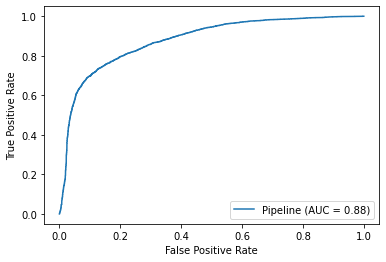

In [18]:
#rbf SVM reliability
MetricsOfReliability(svm_rbf, data_test_df[feature_list], data_test_df['label'], svm_predict_test_df)

<h2>SVM testing complexity of model</h2>

In [61]:
svm_rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=0.1))
svm_rbf.fit(data_train_df[feature_list], data_train_df['label'])
svm_rbf.score(data_test_df[feature_list], data_test_df['label'])

0.7626332288401254

In [62]:
for n in [0.0001, 0.001, 0.1, 1, 5, 10, 20, 50, 100, 200]:
    svm_rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=n))
    svm_rbf.fit(data_train_df[feature_list], data_train_df['label'])
    print(str(n) + ': accuracy = ' + str(svm_rbf.score(data_test_df[feature_list], data_test_df['label'])))

0.0001: accuracy = 0.4952978056426332
0.001: accuracy = 0.7151097178683385
0.1: accuracy = 0.7626332288401254
1: accuracy = 0.7938557993730407
5: accuracy = 0.798244514106583
10: accuracy = 0.7976175548589342
20: accuracy = 0.7997492163009404
50: accuracy = 0.8011285266457681
100: accuracy = 0.8031347962382445
200: accuracy = 0.8020062695924765


<h2>Random Forest</h2>

In [32]:
#RF fit and predict
rf = RandomForestClassifier(oob_score=True)
rf.fit(data_train_df[feature_list], data_train_df['label'])
rf_predict_test_df = rf.predict(data_test_df[feature_list])

100

accuracy = 0.8713479623824452
sensitivity = 0.9257437914925006
specificity = 0.8147389969293757
out-of-bag-error = 0.8663824184092548


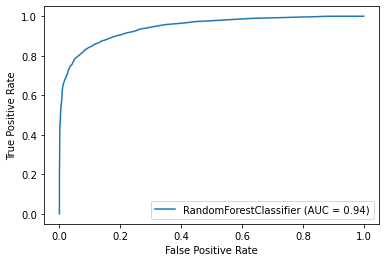

In [30]:
#RF reliabilty metrics
MetricsOfReliability(rf, data_test_df[feature_list], data_test_df['label'], rf_predict_test_df)
print('out-of-bag-error = ' + str(rf.oob_score_))

In [31]:
#out-of-bag-error and accuracy for increasing number of trees
rf = RandomForestClassifier(oob_score=True)
test_error = []
oob_error = []
for n in [10,50,100,500]:
    rf.set_params(n_estimators=n)
    rf.fit(data_train_df[feature_list], data_train_df['label'])
    test_error.append(rf.score(data_test_df[feature_list], data_test_df['label']))
    oob_error.append(rf.oob_score_)

print(test_error)
print(oob_error)



[0.8556739811912226, 0.8709717868338558, 0.8724764890282132, 0.8749843260188088]
[0.8203906323478697, 0.8620559927265887, 0.8671975420885977, 0.8721196350753989]


<h2>RF testing complexity of model</h2>

In [46]:
#varying the max_depth
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=1)
for n in [5,10,15,20,30,40,50]:
    rf.set_params(max_depth=n)
    rf.fit(data_train_df[feature_list], data_train_df['label'])
    print(str(n) + ': accuracy = ' + str(rf.score(data_test_df[feature_list], data_test_df['label'])))

5: accuracy = 0.820564263322884
10: accuracy = 0.8504075235109718
15: accuracy = 0.8664576802507837
20: accuracy = 0.8702194357366771
30: accuracy = 0.8724764890282132
40: accuracy = 0.8731034482758621
50: accuracy = 0.8727272727272727


In [51]:
#varying the min_samples_leaf
rf = RandomForestClassifier(min_samples_leaf=1)
for n in [1,5,10,15,20,30,40,50]:
    rf.set_params(min_samples_leaf=n)
    rf.fit(data_train_df[feature_list], data_train_df['label'])
    print(str(n) + ': accuracy = ' + str(rf.score(data_test_df[feature_list], data_test_df['label'])))

1: accuracy = 0.8727272727272727
5: accuracy = 0.866833855799373
10: accuracy = 0.8626959247648903
15: accuracy = 0.8609404388714733
20: accuracy = 0.8560501567398119
30: accuracy = 0.8507836990595611
40: accuracy = 0.8455172413793104
50: accuracy = 0.8421316614420062


In [52]:
#varying the min_samples_split
rf = RandomForestClassifier(min_samples_split=2)
for n in [2,5,10,15,20,30,40,50]:
    rf.set_params(min_samples_split=n)
    rf.fit(data_train_df[feature_list], data_train_df['label'])
    print(str(n) + ': accuracy = ' + str(rf.score(data_test_df[feature_list], data_test_df['label'])))

2: accuracy = 0.8705956112852664
5: accuracy = 0.8734796238244514
10: accuracy = 0.8680877742946709
15: accuracy = 0.8683385579937304
20: accuracy = 0.8699686520376175
30: accuracy = 0.8650783699059561
40: accuracy = 0.8596865203761755
50: accuracy = 0.857680250783699
